In [27]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs2/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs2/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [28]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [29]:
analysis = scripts.Analysis()

In [30]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_12',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_12',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_none',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [31]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_12',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_12',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_none',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [32]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [33]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [34]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [35]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [36]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1100

nband = 115

nv = 200

dv = 0.005

tsfc = 294.0

ng = 12

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 12 /)

data wgt
     &     /12*1/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 1e-24

include 'mls75.pro'


In [37]:
fig.display_hrefanchor()

In [38]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [39]:
table_dgdgs.display_hrefanchor()

In [40]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [41]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [42]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

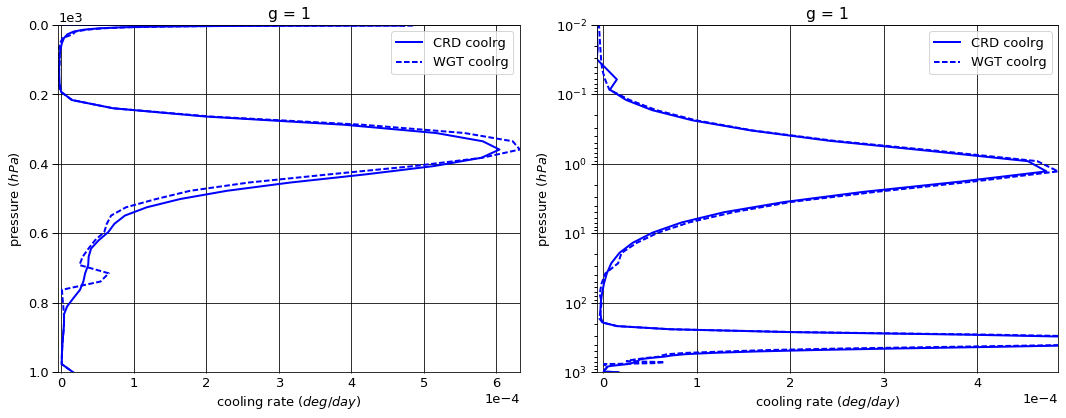

# Figure: cooling rate g-group 2

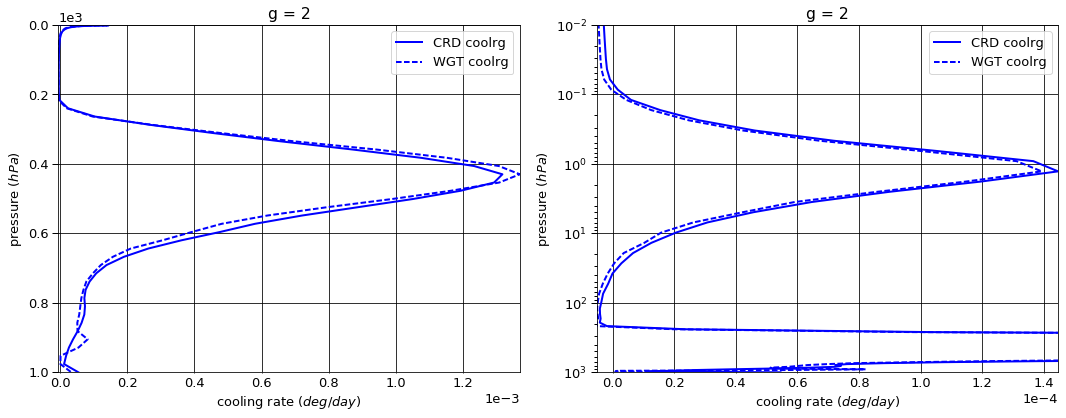

# Figure: cooling rate g-group 3

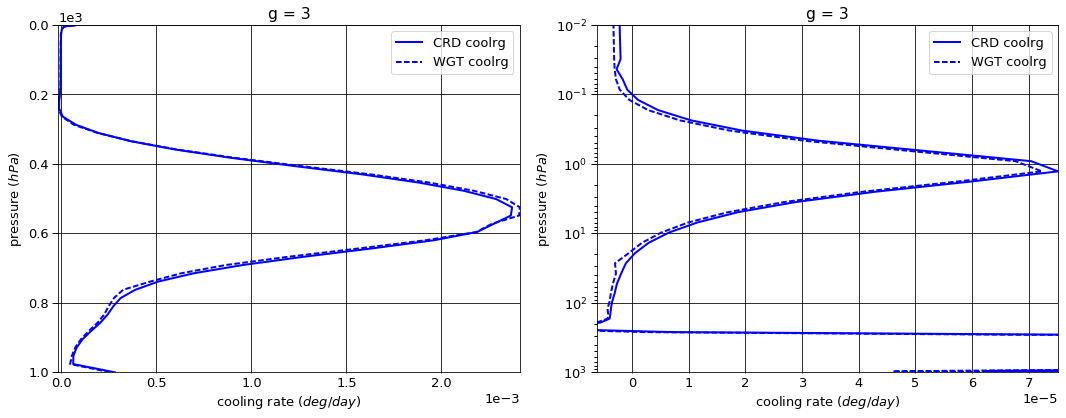

# Figure: cooling rate g-group 4

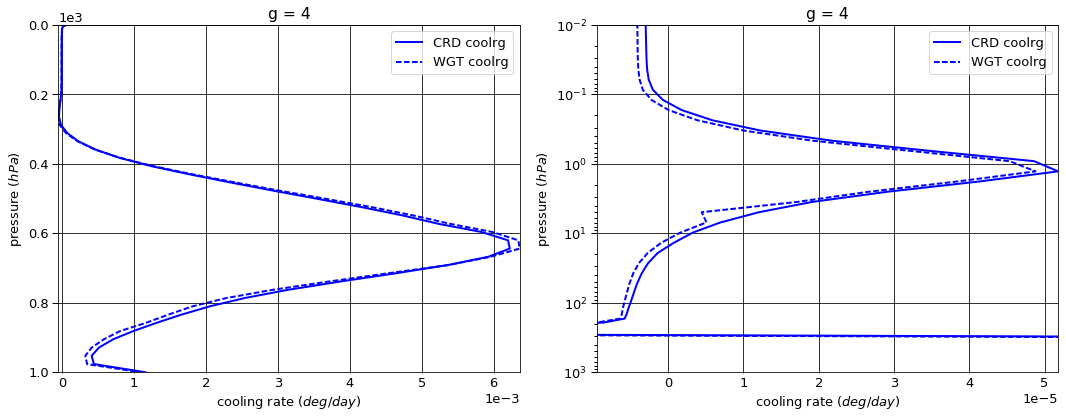

# Figure: cooling rate g-group 5

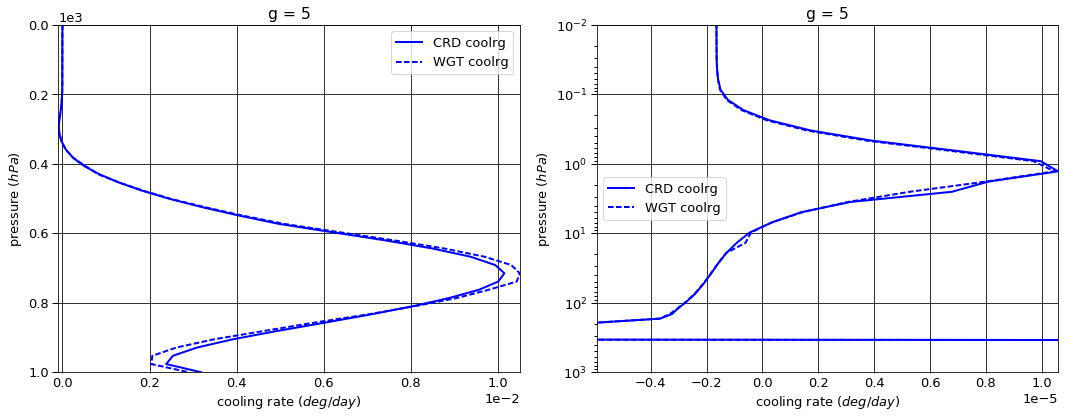

# Figure: cooling rate g-group 6

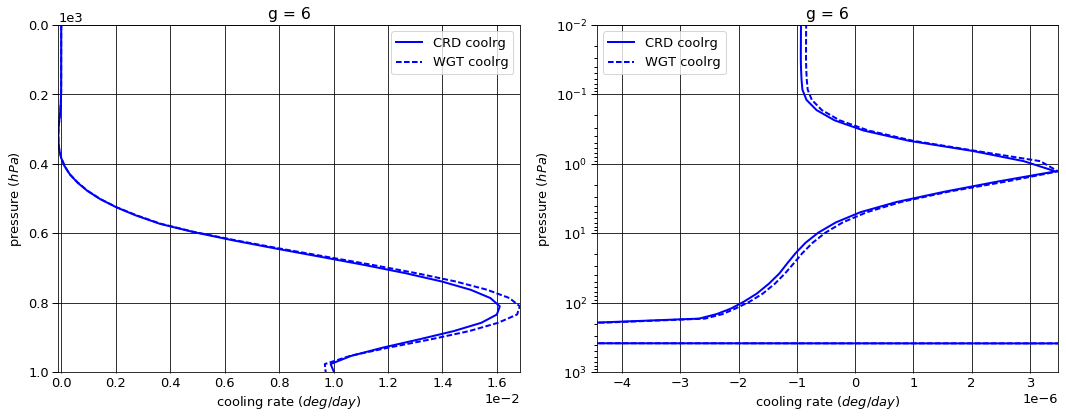

# Figure: cooling rate g-group 7

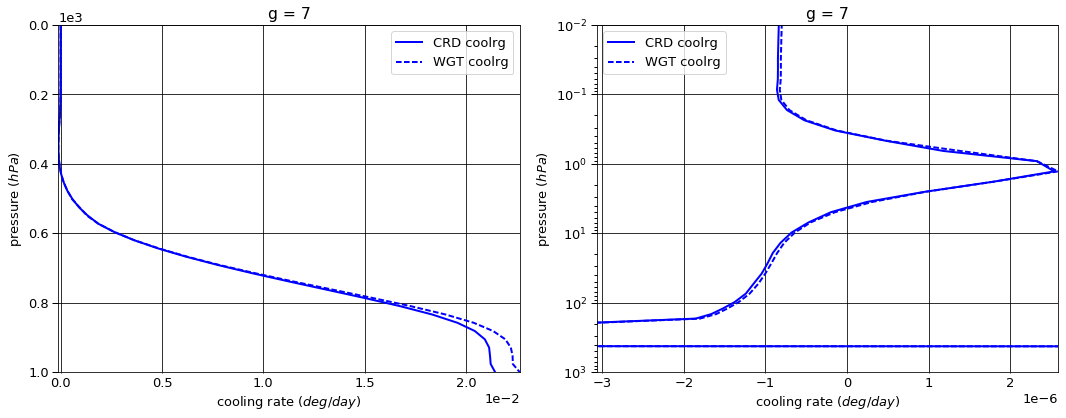

# Figure: cooling rate g-group 8

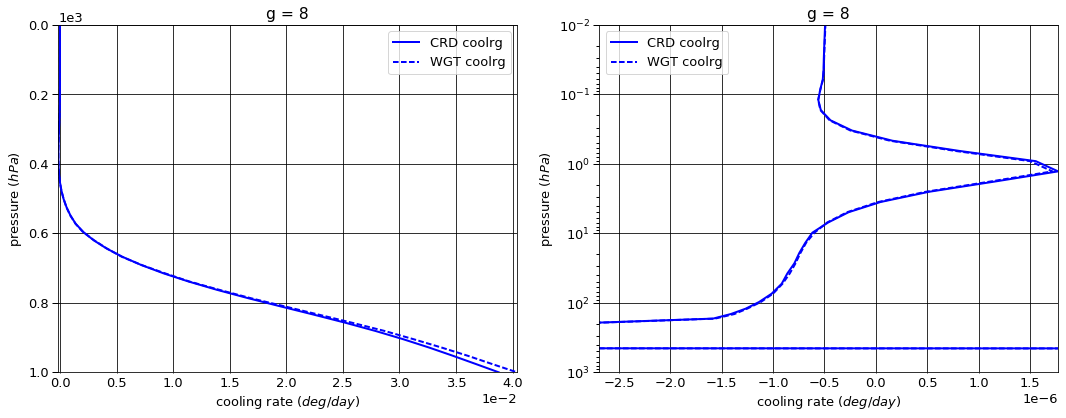

# Figure: cooling rate g-group 9

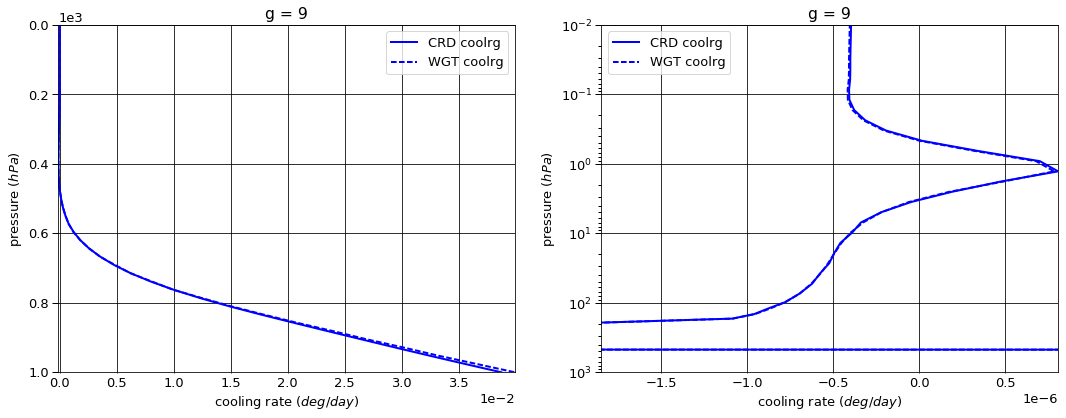

# Figure: cooling rate g-group 10

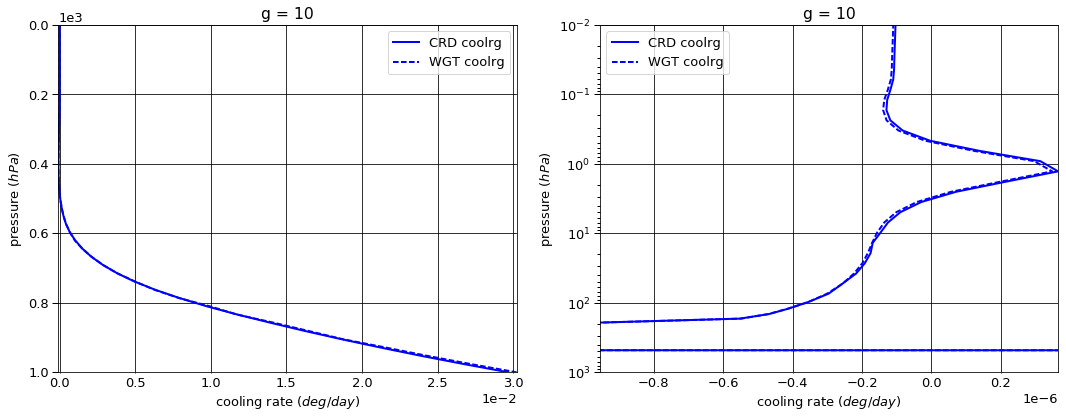

# Figure: cooling rate g-group 11

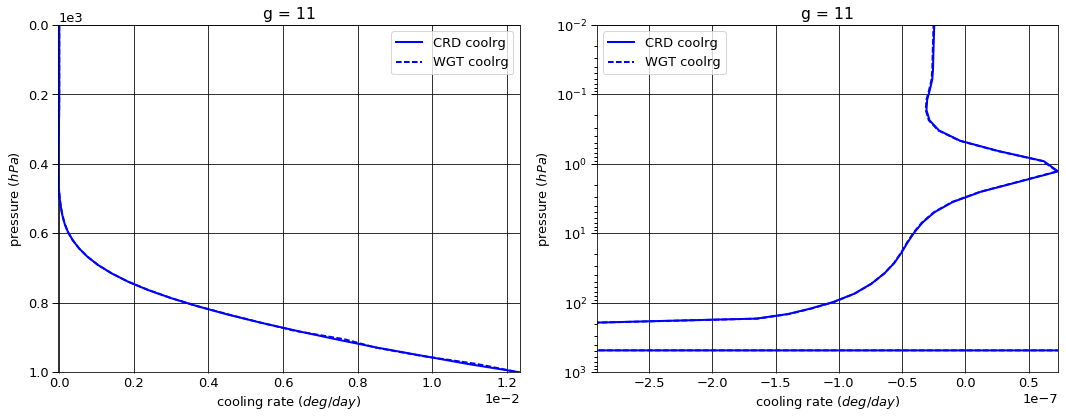

# Figure: cooling rate g-group 12

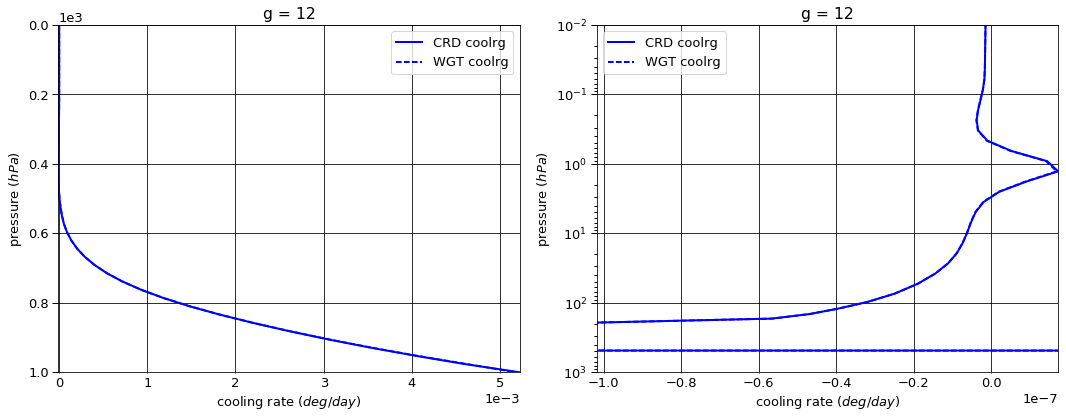

# Figure: cooling rate g-group total

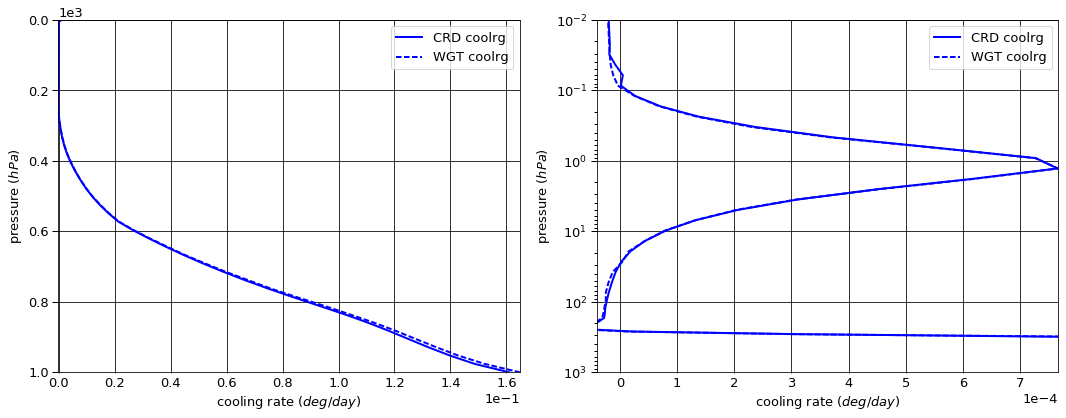

In [43]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [44]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.015073  0.000000 -0.015073
   1013.0   76    -0.051532  0.051486 -0.000046
2  0.0      1     -0.039296  0.000000 -0.039296
   1013.0   76    -0.106167  0.106023 -0.000144
3  0.0      1     -0.084086  0.000000 -0.084086
   1013.0   76    -0.181148  0.180383 -0.000765
4  0.0      1     -0.230321  0.000000 -0.230321
   1013.0   76    -0.414570  0.410717 -0.003853
5  0.0      1     -0.410541  0.000000 -0.410541
   1013.0   76    -0.621262  0.605916 -0.015346
6  0.0      1     -0.722598  0.000000 -0.722598
   1013.0   76    -0.949394  0.863035 -0.086360
7  0.0      1     -1.107909  0.000000 -1.107909
   1013.0   76    -1.291793  0.915125 -0.376668
8  0.0      1     -2.326540  0.000000 -2.326540
   1013.0   76    -2.524060  1.165465 -1.358596
9  0.0      1     -3.691852  0.000000 -3.691852
   1013.0   76    -3.838252  0.965583 -2.872669
10 0.0      1     -5.194181  0.000000 -5.194181
   1013.0   76    -5.287446  0.666496 -4.620950
11 0.0      1     -4.164384  0.000000 -4.164384
   1013.0   76    -4.198776  0.261663 -3.937113
12 0.0      1     -3.791682  0.000000 -3.791682
   1013.0   76    -3.805259  0.106712 -3.698547


WGT


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.014628  0.000000 -0.014628
   1013.0   76    -0.051532  0.051486 -0.000046
2  0.0      1     -0.038260  0.000000 -0.038260
   1013.0   76    -0.106167  0.106074 -0.000093
3  0.0      1     -0.083135  0.000000 -0.083135
   1013.0   76    -0.181148  0.180462 -0.000687
4  0.0      1     -0.227563  0.000000 -0.227563
   1013.0   76    -0.414570  0.411287 -0.003282
5  0.0      1     -0.406968  0.000000 -0.406968
   1013.0   76    -0.621262  0.610126 -0.011135
6  0.0      1     -0.717613  0.000000 -0.717613
   1013.0   76    -0.949394  0.884713 -0.064681
7  0.0      1     -1.103951  0.000000 -1.103951
   1013.0   76    -1.291793  0.946226 -0.345567
8  0.0      1     -2.323428  0.000000 -2.323428
   1013.0   76    -2.524060  1.194498 -1.329562
9  0.0      1     -3.690353  0.000000 -3.690353
   1013.0   76    -3.838252  0.982670 -2.855582
10 0.0      1     -5.193487  0.000000 -5.193487
   1013.0   76    -5.287446  0.673970 -4.613476
11 0.0      1     -4.164329  0.000000 -4.164329
   1013.0   76    -4.198776  0.262785 -3.935992
12 0.0      1     -3.791655  0.000000 -3.791655
   1013.0   76    -3.805259  0.106840 -3.698419


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1      0.000445  0.000000  0.000445
   1013.0   76     0.000000  0.000000  0.000000
2  0.0      1      0.001036  0.000000  0.001036
   1013.0   76     0.000000  0.000050  0.000050
3  0.0      1      0.000950  0.000000  0.000950
   1013.0   76     0.000000  0.000079  0.000079
4  0.0      1      0.002758  0.000000  0.002758
   1013.0   76     0.000000  0.000570  0.000570
5  0.0      1      0.003573  0.000000  0.003573
   1013.0   76     0.000000  0.004210  0.004210
6  0.0      1      0.004985  0.000000  0.004985
   1013.0   76     0.000000  0.021679  0.021679
7  0.0      1      0.003958  0.000000  0.003958
   1013.0   76     0.000000  0.031101  0.031101
8  0.0      1      0.003113  0.000000  0.003113
   1013.0   76     0.000000  0.029034  0.029033
9  0.0      1      0.001499  0.000000  0.001499
   1013.0   76     0.000000  0.017087  0.017087
10 0.0      1      0.000694  0.000000  0.000694
   1013.0   76     0.000000  0.007475  0.007474
11 0.0      1      0.000056  0.000000  0.000056
   1013.0   76     0.000000  0.001121  0.001121
12 0.0      1      0.000026  0.000000  0.000026
   1013.0   76     0.000000  0.000128  0.000128

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -1.116403e-05
   1001.112500 75     1.630675e-05
2  0.000312    1     -4.078100e-06
   1001.112500 75     5.451015e-05
3  0.000312    1     -2.439666e-06
   1001.112500 75     2.813574e-04
4  0.000312    1     -3.114813e-06
   1001.112500 75     1.162478e-03
5  0.000312    1     -1.632282e-06
   1001.112500 75     3.190466e-03
6  0.000312    1     -9.096205e-07
   1001.112500 75     1.001955e-02
7  0.000312    1     -8.030572e-07
   1001.112500 75     2.144609e-02
8  0.000312    1     -4.615273e-07
   1001.112500 75     3.877585e-02
9  0.000312    1     -3.841168e-07
   1001.112500 75     3.876283e-02
10 0.000312    1     -9.527268e-08
   1001.112500 75     2.968326e-02
11 0.000312    1     -2.264737e-08
   1001.112500 75     1.235319e-02
12 0.000312    1     -1.158787e-09
   1001.112500 75     5.225350e-03


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -8.787465e-06
   1001.112500 75     1.630675e-05
2  0.000312    1     -5.558168e-06
   1001.112500 75     3.344323e-05
3  0.000312    1     -3.412723e-06
   1001.112500 75     2.594022e-04
4  0.000312    1     -4.127271e-06
   1001.112500 75     1.093377e-03
5  0.000312    1     -1.616060e-06
   1001.112500 75     2.909127e-03
6  0.000312    1     -8.232729e-07
   1001.112500 75     9.711225e-03
7  0.000312    1     -7.666574e-07
   1001.112500 75     2.266126e-02
8  0.000312    1     -4.574325e-07
   1001.112500 75     4.040067e-02
9  0.000312    1     -3.912136e-07
   1001.112500 75     3.995179e-02
10 0.000312    1     -1.012047e-07
   1001.112500 75     3.023172e-02
11 0.000312    1     -2.321176e-08
   1001.112500 75     1.232067e-02
12 0.000312    1     -1.152783e-09
   1001.112500 75     5.186269e-03


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      2.376569e-06
   1001.112500 75     0.000000e+00
2  0.000312    1     -1.480068e-06
   1001.112500 75    -2.106692e-05
3  0.000312    1     -9.730566e-07
   1001.112500 75    -2.195513e-05
4  0.000312    1     -1.012458e-06
   1001.112500 75    -6.910130e-05
5  0.000312    1      1.622150e-08
   1001.112500 75    -2.813399e-04
6  0.000312    1      8.634761e-08
   1001.112500 75    -3.083216e-04
7  0.000312    1      3.639971e-08
   1001.112500 75     1.215168e-03
8  0.000312    1      4.094780e-09
   1001.112500 75     1.624825e-03
9  0.000312    1     -7.096810e-09
   1001.112500 75     1.188957e-03
10 0.000312    1     -5.932025e-09
   1001.112500 75     5.484560e-04
11 0.000312    1     -5.643830e-10
   1001.112500 75    -3.252300e-05
12 0.000312    1      6.004000e-12
   1001.112500 75    -3.908080e-05

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-21.778462,0.000000,-21.778462
1013.0,76,-23.269660,6.298604,-16.971056



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-21.75537,0.000000,-21.755370
1013.0,76,-23.26966,6.411137,-16.858523



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.023092,0.000000,0.023092
1013.0,76,0.000000,0.112533,0.112533


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000025
1001.112500,75,0.160971



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000026
1001.112500,75,0.164775



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-9.595373e-07
1001.112500,75,3.804017e-03


In [45]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.002391,0.002150
2,0.004870,0.004452
3,0.008087,0.007676
4,0.018043,0.017732
5,0.027478,0.026424
6,0.042087,0.040351
7,0.057043,0.054955
8,0.112174,0.107136
9,0.169348,0.163333


In [46]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,6.614508e-22
2,2.720835e-22
3,1.119198e-22
4,4.603749e-23
5,1.893722e-23
6,7.789704e-24
7,3.204245e-24
8,1.318045e-24
9,5.421694e-25


In [47]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [12]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [48]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,6.614508e-22,NaN,0.002391,0.002150,0.002391,0.002150,600.0
2,2.720835e-22,0.411344,0.004870,0.004452,0.007261,0.006601,600.0
3,1.119198e-22,0.411344,0.008087,0.007676,0.015348,0.014278,600.0
4,4.603749e-23,0.411344,0.018043,0.017732,0.033391,0.032010,600.0
5,1.893722e-23,0.411344,0.027478,0.026424,0.060870,0.058434,600.0
6,7.789704e-24,0.411344,0.042087,0.040351,0.102957,0.098786,600.0
7,3.204245e-24,0.411344,0.057043,0.054955,0.160000,0.153740,600.0
8,1.318045e-24,0.411344,0.112174,0.107136,0.272174,0.260876,600.0
9,5.421694e-25,0.411344,0.169348,0.163333,0.441522,0.424209,600.0


In [49]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [50]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                     
1     1      0.000312  1.114768e-21  4.032453e-23  27.644907
      2      0.000312  1.743136e-22  1.239448e-23  14.063804
      3      0.000312  3.790377e-23  4.776185e-24   7.935992
      4      0.000312  1.464117e-23  1.426211e-24  10.265777
      5      0.000312  2.850733e-24  2.430120e-25  11.730833
      6      0.000312  7.610977e-25  9.598597e-26   7.929260
      7      0.000312  4.340178e-25  5.084150e-26   8.536684
      8      0.000312  1.175744e-25  2.161965e-26   5.438314
      9      0.000312  6.128660e-26  6.928475e-27   8.845613
      10     0.000312  1.105133e-26  2.131290e-27   5.185281
      11     0.000312  3.150170e-27  8.052851e-28   3.911869
      12     0.000312  1.709655e-28  7.720921e-29   2.214315
2     1      0.000750  1.121978e-21  4.037816e-23  27.786747
      2      0.000750  1.753436e-22  1.241081e-23  14.128296
      3      0.000750  3.820844e-23  4.783277e-24   7.987921
      4      0.000750  1.473714e-23  1.429173e-24  10.311653
      5      0.000750  2.867933e-24  2.435281e-25  11.776599
      6      0.000750  7.651113e-25  9.636405e-26   7.939800
      7      0.000750  4.365570e-25  5.099185e-26   8.561311
      8      0.000750  1.183761e-25  2.169994e-26   5.455137
      9      0.000750  6.157067e-26  6.954615e-27   8.853210
      10     0.000750  1.113025e-26  2.139809e-27   5.201515
      11     0.000750  3.172333e-27  8.083006e-28   3.924694
      12     0.000750  1.733895e-28  7.796970e-29   2.223806
3     1      0.001052  1.137418e-21  4.048180e-23  28.097033
      2      0.001052  1.775430e-22  1.244282e-23  14.268706
      3      0.001052  3.886110e-23  4.797796e-24   8.099782
      4      0.001052  1.494230e-23  1.435226e-24  10.411116
      5      0.001052  2.904743e-24  2.445830e-25  11.876308
      6      0.001052  7.736805e-25  9.715386e-26   7.963456
      7      0.001052  4.419898e-25  5.130374e-26   8.615157
      8      0.001052  1.200936e-25  2.186841e-26   5.491647
      9      0.001052  6.217779e-26  7.009130e-27   8.870971
      10     0.001052  1.129981e-26  2.157656e-27   5.237078
      11     0.001052  3.219848e-27  8.145808e-28   3.952767
      12     0.001052  1.786275e-28  7.957266e-29   2.244835
4     1      0.001476  1.153932e-21  4.059606e-23  28.424725
      2      0.001476  1.798939e-22  1.247657e-23  14.418533
      3      0.001476  3.956191e-23  4.813385e-24   8.219147
      4      0.001476  1.516224e-23  1.441712e-24  10.516833
      5      0.001476  2.944130e-24  2.457184e-25  11.981721
      6      0.001476  7.828391e-25  9.799592e-26   7.988487
      7      0.001476  4.478049e-25  5.163620e-26   8.672305
      8      0.001476  1.219402e-25  2.204813e-26   5.530634
      9      0.001476  6.282774e-26  7.067446e-27   8.889738
      10     0.001476  1.148266e-26  2.176714e-27   5.275227
      11     0.001476  3.271050e-27  8.212430e-28   3.983047
      12     0.001476  1.843576e-28  8.129966e-29   2.267630
5     1      0.002070  1.170631e-21  4.071648e-23  28.750792
      2      0.002070  1.822704e-22  1.251047e-23  14.569431
      3      0.002070  4.027370e-23  4.829286e-24   8.339475
      4      0.002070  1.538527e-23  1.448310e-24  10.622916
      5      0.002070  2.983984e-24  2.468797e-25  12.086795
      6      0.002070  7.920970e-25  9.884638e-26   8.013415
      7      0.002070  4.536918e-25  5.197211e-26   8.729524
      8      0.002070  1.238184e-25  2.222968e-26   5.569958
      9      0.002070  6.348590e-26  7.126537e-27   8.908380
      10     0.002070  1.166920e-26  2.195997e-27   5.313853
      11     0.002070  3.323257e-27  8.279375e-28   4.013898
      12     0.002070  1.902927e-28  8.306248e-29   2.290958
6     1      0.002904  1.187499e-21  4.084452e-23  29.073644
      2      0.002904  1.846708e-22  1.254478e-23  14.720928
      3      0.002904  4.099600e-23  4.845568e-24   8.460515
      4      0.002904  1.561127e-23  1.455048e-2

# Histogram of wavenumbers in g-group 1

In [51]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [52]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
